# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

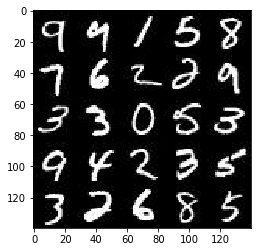

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[show_n_images:2*show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

In [3]:
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[show_n_images:2*show_n_images], 28, 28, 'L')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

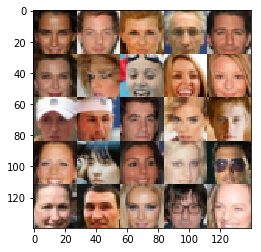

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real=tf.placeholder(tf.float32,(None,image_width, image_height, image_channels),name='inputs_real')
    inputs_z=tf.placeholder(tf.float32,(None,z_dim),name='inputs_z')
    learningrate=tf.placeholder(tf.float32,name='learningrate')
    
    

    return inputs_real, inputs_z, learningrate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [7]:
def discriminator(images, reuse=False,alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        init=tf.random_normal_initializer(mean=0,stddev=0.02)
        # Input layer is 28x28x3
        h1=tf.layers.conv2d(images, 64,5,strides=2, padding='SAME',kernel_initializer=init)
        relu1=tf.maximum(alpha*h1,h1)
        # 14x14x64
        
        h2=tf.layers.conv2d(relu1,128,5,strides=2,padding="SAME",kernel_initializer=init)
        h2=tf.layers.batch_normalization(h2,training=True)
        h2=tf.maximum(alpha*h2,h2)

        
        
        
        
        # 7x7x128
        
        
        h3=tf.layers.conv2d(h2,256,5,strides=1,padding="VALID",kernel_initializer=init)
        h3=tf.layers.batch_normalization(h3,training=True)
        relu3=tf.maximum(alpha*h3,h3)
        # 3x3x256
        
        

        # 1x1x512
        flat = tf.reshape(h2, (-1, 7*7*128))
        
        logit=tf.layers.dense(flat,1)
        out=tf.sigmoid(logit)

    return out, logit


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True,reuse=False,alpha=0.01):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not is_train
    
    with tf.variable_scope('generator',reuse=reuse):
#     with tf.variable_scope('generator'):
    
#     with tf.variable_scope('generator', reuse=reuse):
        init= tf.contrib.layers.xavier_initializer()
        h1=tf.layers.dense(z,7*7*512,kernel_initializer=init)
        h1=tf.reshape(h1,(-1,7,7,512))
        h1=tf.layers.batch_normalization(h1,training=is_train)
        h1=tf.maximum(alpha*h1,h1)
        
        
        
        
        # 3x3x512
        h2 = tf.layers.conv2d_transpose(h1, 256, 3, strides=2, padding='SAME',kernel_initializer=init)
        h2=tf.layers.batch_normalization(h2,training=is_train)
        h2=tf.maximum(alpha*h2,h2)
        

        

#         print(h2,t1)
        
        # 7x7x256
        h3 = tf.layers.conv2d_transpose(h1, 128, 3, strides=2, padding='SAME',kernel_initializer=init)
        h3=tf.layers.batch_normalization(h3,training=is_train)
        h3=tf.maximum(alpha*h3,h3)
        # 14x14x128
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 3, strides=2, padding='SAME',kernel_initializer=init)
        # 28x28x3
        out=tf.tanh(logits)
        # 28x28x3
        
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim,alpha=0.01):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model=generator(input_z,out_channel_dim=out_channel_dim,is_train=True,alpha = 0.01)
    d_model_real,d_logits_real=discriminator(input_real,alpha = 0.01)
    d_model_fake,d_logits_fake=discriminator(g_model,reuse=True,alpha = 0.01)
    
    
    d_loss_real=tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_logits_real)* 0.9))
    d_loss_fake=tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.zeros_like(d_logits_fake)))
    
    
    g_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_logits_fake)*0.9))
    d_loss=d_loss_real+d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_var=tf.trainable_variables()
    d_var=[var for var in t_var if var.name.startswith('discriminator')]
    g_var=[var for var in t_var if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_op=tf.train.AdamOptimizer(beta1=beta1,learning_rate=learning_rate).minimize(d_loss,var_list=d_var)
    
        g_train_op=tf.train.AdamOptimizer(beta1=beta1,learning_rate=learning_rate).minimize(g_loss,var_list=g_var)
    
    
    return d_train_op, g_train_op


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,alpha,writer):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    image_width, image_height, image_channels=data_shape[1:]
    
    input_real, input_z,learningrate=model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss=model_loss(input_real, input_z, image_channels,alpha=alpha)
    d_train_op, g_train_op=model_opt(d_loss, g_loss, learningrate, beta1)
    

    saver = tf.train.Saver()
    
    steps = 0
    sc=1
    with tf.Session() as sess:
        tf.summary.scalar('d_loss',d_loss)
        tf.summary.scalar('g_loss',g_loss)
        merge_summary=tf.summary.merge_all()
        sess.run(tf.global_variables_initializer())
        
        writer.add_graph(sess.graph)
        for epoch_i in range(epoch_count):
            
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps+=1

                
                
                batch_z = np.random.uniform(-1, 1, size=(1*batch_size, z_dim))
                batch_images=batch_images*2
                feed_dict={input_real: batch_images, input_z: batch_z,learningrate:learning_rate}
                train_loss_d,_ = sess.run([d_loss,d_train_op], feed_dict=feed_dict)
                train_loss_g,_ = sess.run([g_loss,g_train_op], feed_dict=feed_dict)
                train_loss_g,_ = sess.run([g_loss,g_train_op], feed_dict=feed_dict)
                
                if train_loss_d>train_loss_g:
                    sess.run(d_train_op, feed_dict=feed_dict)
                else:
                    sess.run(g_train_op, feed_dict=feed_dict)
                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                if steps % 20 == 0:
                    

                    train_loss_d = sess.run(d_loss, feed_dict)
                    train_loss_g = sess.run(g_loss, feed_dict)
                    s=sess.run(merge_summary,feed_dict)
                    writer.add_summary(s,steps)

                    

                    print("Step : {} Epoch {}/{}...".format(steps,epoch_i+1, epoch_count),
                  "Discriminator Loss: {:.4f}...".format(train_loss_d),
                  "Generator Loss: {:.4f}".format(train_loss_g)) 
                    losses.append((train_loss_d, train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [13]:
!rm -r /tmp/gan

Step : 20 Epoch 1/2... Discriminator Loss: 1.0928... Generator Loss: 1.0775
Step : 40 Epoch 1/2... Discriminator Loss: 1.1335... Generator Loss: 1.2998
Step : 60 Epoch 1/2... Discriminator Loss: 1.1306... Generator Loss: 1.2114
Step : 80 Epoch 1/2... Discriminator Loss: 1.1480... Generator Loss: 1.1893


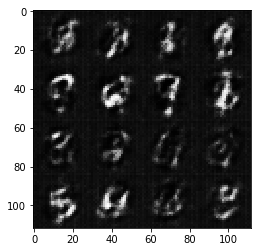

Step : 100 Epoch 1/2... Discriminator Loss: 1.1043... Generator Loss: 1.1854
Step : 120 Epoch 1/2... Discriminator Loss: 1.0807... Generator Loss: 1.2174
Step : 140 Epoch 1/2... Discriminator Loss: 1.2343... Generator Loss: 0.6868
Step : 160 Epoch 1/2... Discriminator Loss: 1.0280... Generator Loss: 1.2114
Step : 180 Epoch 1/2... Discriminator Loss: 1.0901... Generator Loss: 1.1950


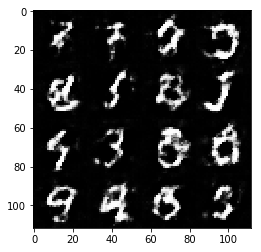

Step : 200 Epoch 1/2... Discriminator Loss: 1.0985... Generator Loss: 1.2374
Step : 220 Epoch 1/2... Discriminator Loss: 1.2023... Generator Loss: 1.0924
Step : 240 Epoch 1/2... Discriminator Loss: 1.1626... Generator Loss: 1.1587
Step : 260 Epoch 1/2... Discriminator Loss: 1.1862... Generator Loss: 1.0930
Step : 280 Epoch 1/2... Discriminator Loss: 1.2044... Generator Loss: 1.0458


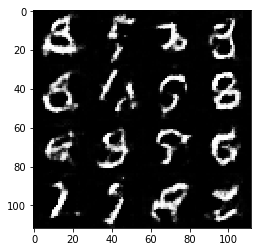

Step : 300 Epoch 1/2... Discriminator Loss: 1.2107... Generator Loss: 1.0749
Step : 320 Epoch 1/2... Discriminator Loss: 1.1978... Generator Loss: 1.0163
Step : 340 Epoch 1/2... Discriminator Loss: 1.2610... Generator Loss: 0.9632
Step : 360 Epoch 1/2... Discriminator Loss: 1.2300... Generator Loss: 0.9978
Step : 380 Epoch 1/2... Discriminator Loss: 1.1880... Generator Loss: 0.9761


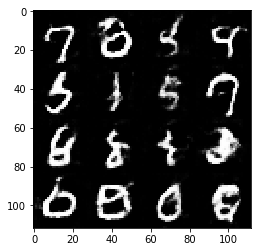

Step : 400 Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.9911
Step : 420 Epoch 1/2... Discriminator Loss: 1.2113... Generator Loss: 1.0081
Step : 440 Epoch 1/2... Discriminator Loss: 1.2147... Generator Loss: 1.0113
Step : 460 Epoch 1/2... Discriminator Loss: 1.1431... Generator Loss: 1.0355
Step : 480 Epoch 1/2... Discriminator Loss: 1.2374... Generator Loss: 1.0119


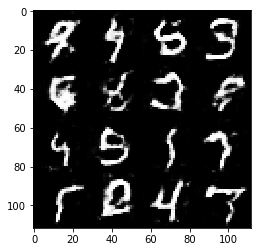

Step : 500 Epoch 1/2... Discriminator Loss: 1.1525... Generator Loss: 1.1144
Step : 520 Epoch 1/2... Discriminator Loss: 1.1872... Generator Loss: 1.0163
Step : 540 Epoch 1/2... Discriminator Loss: 1.1989... Generator Loss: 1.0319
Step : 560 Epoch 1/2... Discriminator Loss: 1.1805... Generator Loss: 0.9689
Step : 580 Epoch 1/2... Discriminator Loss: 1.1869... Generator Loss: 1.0567


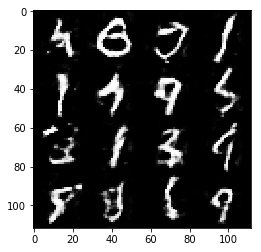

Step : 600 Epoch 1/2... Discriminator Loss: 1.1810... Generator Loss: 1.0152
Step : 620 Epoch 1/2... Discriminator Loss: 1.1075... Generator Loss: 1.1229
Step : 640 Epoch 1/2... Discriminator Loss: 1.2076... Generator Loss: 1.0288
Step : 660 Epoch 1/2... Discriminator Loss: 1.1958... Generator Loss: 1.0243
Step : 680 Epoch 1/2... Discriminator Loss: 1.1351... Generator Loss: 1.0769


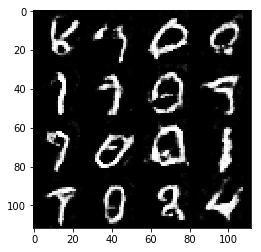

Step : 700 Epoch 1/2... Discriminator Loss: 1.1991... Generator Loss: 1.0448
Step : 720 Epoch 1/2... Discriminator Loss: 1.1994... Generator Loss: 1.1197
Step : 740 Epoch 1/2... Discriminator Loss: 1.1821... Generator Loss: 1.0552
Step : 760 Epoch 1/2... Discriminator Loss: 1.2106... Generator Loss: 1.0156
Step : 780 Epoch 1/2... Discriminator Loss: 1.1747... Generator Loss: 1.0929


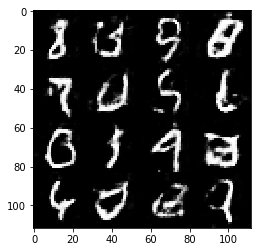

Step : 800 Epoch 1/2... Discriminator Loss: 1.1925... Generator Loss: 1.0307
Step : 820 Epoch 1/2... Discriminator Loss: 1.1957... Generator Loss: 0.9990
Step : 840 Epoch 1/2... Discriminator Loss: 1.2122... Generator Loss: 0.9435
Step : 860 Epoch 1/2... Discriminator Loss: 1.2864... Generator Loss: 1.0219
Step : 880 Epoch 1/2... Discriminator Loss: 1.1588... Generator Loss: 1.0143


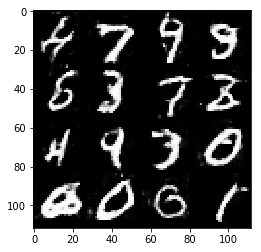

Step : 900 Epoch 1/2... Discriminator Loss: 1.1804... Generator Loss: 1.0059
Step : 920 Epoch 1/2... Discriminator Loss: 1.1716... Generator Loss: 1.0338
Step : 940 Epoch 2/2... Discriminator Loss: 1.1776... Generator Loss: 1.2286
Step : 960 Epoch 2/2... Discriminator Loss: 1.2092... Generator Loss: 1.0022
Step : 980 Epoch 2/2... Discriminator Loss: 1.1683... Generator Loss: 1.2517


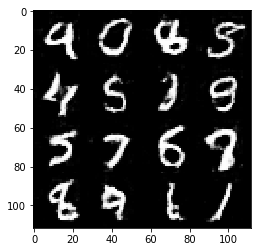

Step : 1000 Epoch 2/2... Discriminator Loss: 1.1967... Generator Loss: 1.0263
Step : 1020 Epoch 2/2... Discriminator Loss: 1.2076... Generator Loss: 1.0474
Step : 1040 Epoch 2/2... Discriminator Loss: 1.1829... Generator Loss: 0.9934
Step : 1060 Epoch 2/2... Discriminator Loss: 1.1559... Generator Loss: 1.0300
Step : 1080 Epoch 2/2... Discriminator Loss: 1.1413... Generator Loss: 1.0527


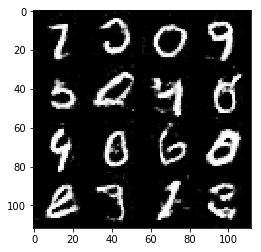

Step : 1100 Epoch 2/2... Discriminator Loss: 1.1741... Generator Loss: 1.0364
Step : 1120 Epoch 2/2... Discriminator Loss: 1.2118... Generator Loss: 1.0569
Step : 1140 Epoch 2/2... Discriminator Loss: 1.1141... Generator Loss: 1.0994
Step : 1160 Epoch 2/2... Discriminator Loss: 1.1699... Generator Loss: 1.0574
Step : 1180 Epoch 2/2... Discriminator Loss: 1.3210... Generator Loss: 1.2266


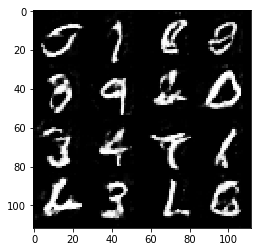

Step : 1200 Epoch 2/2... Discriminator Loss: 1.2978... Generator Loss: 0.7136
Step : 1220 Epoch 2/2... Discriminator Loss: 1.1069... Generator Loss: 1.0894
Step : 1240 Epoch 2/2... Discriminator Loss: 1.1342... Generator Loss: 1.0693
Step : 1260 Epoch 2/2... Discriminator Loss: 1.1115... Generator Loss: 1.1605
Step : 1280 Epoch 2/2... Discriminator Loss: 1.0952... Generator Loss: 1.1202


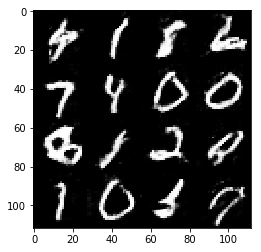

Step : 1300 Epoch 2/2... Discriminator Loss: 1.5064... Generator Loss: 1.9250
Step : 1320 Epoch 2/2... Discriminator Loss: 1.1244... Generator Loss: 1.0644
Step : 1340 Epoch 2/2... Discriminator Loss: 1.1637... Generator Loss: 1.0747
Step : 1360 Epoch 2/2... Discriminator Loss: 1.1296... Generator Loss: 1.1618
Step : 1380 Epoch 2/2... Discriminator Loss: 1.0839... Generator Loss: 1.0516


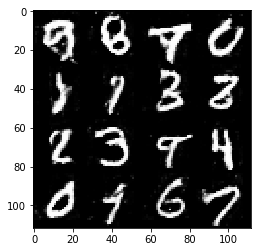

Step : 1400 Epoch 2/2... Discriminator Loss: 1.1520... Generator Loss: 1.0887
Step : 1420 Epoch 2/2... Discriminator Loss: 1.0855... Generator Loss: 1.0783
Step : 1440 Epoch 2/2... Discriminator Loss: 1.1002... Generator Loss: 1.0763
Step : 1460 Epoch 2/2... Discriminator Loss: 1.0877... Generator Loss: 1.1647
Step : 1480 Epoch 2/2... Discriminator Loss: 1.1401... Generator Loss: 1.0659


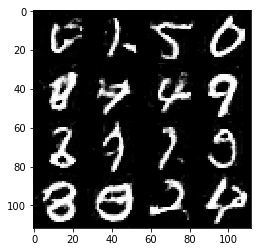

Step : 1500 Epoch 2/2... Discriminator Loss: 1.0862... Generator Loss: 1.1120
Step : 1520 Epoch 2/2... Discriminator Loss: 1.1450... Generator Loss: 1.0212
Step : 1540 Epoch 2/2... Discriminator Loss: 1.1322... Generator Loss: 1.0212
Step : 1560 Epoch 2/2... Discriminator Loss: 1.1866... Generator Loss: 1.0663
Step : 1580 Epoch 2/2... Discriminator Loss: 1.1247... Generator Loss: 1.0990


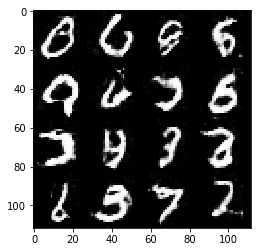

Step : 1600 Epoch 2/2... Discriminator Loss: 1.0816... Generator Loss: 1.1418
Step : 1620 Epoch 2/2... Discriminator Loss: 1.3708... Generator Loss: 0.6385
Step : 1640 Epoch 2/2... Discriminator Loss: 1.0417... Generator Loss: 1.0474
Step : 1660 Epoch 2/2... Discriminator Loss: 1.1458... Generator Loss: 1.0303
Step : 1680 Epoch 2/2... Discriminator Loss: 1.0866... Generator Loss: 1.2528


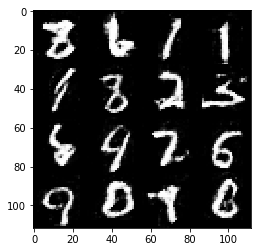

Step : 1700 Epoch 2/2... Discriminator Loss: 1.1022... Generator Loss: 1.4805
Step : 1720 Epoch 2/2... Discriminator Loss: 1.1047... Generator Loss: 1.0907
Step : 1740 Epoch 2/2... Discriminator Loss: 1.1022... Generator Loss: 1.0786
Step : 1760 Epoch 2/2... Discriminator Loss: 1.0507... Generator Loss: 1.1269
Step : 1780 Epoch 2/2... Discriminator Loss: 1.1090... Generator Loss: 1.0913


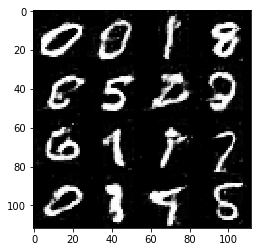

Step : 1800 Epoch 2/2... Discriminator Loss: 1.1168... Generator Loss: 1.1845
Step : 1820 Epoch 2/2... Discriminator Loss: 1.1047... Generator Loss: 1.0897
Step : 1840 Epoch 2/2... Discriminator Loss: 1.0381... Generator Loss: 1.1337
Step : 1860 Epoch 2/2... Discriminator Loss: 1.1540... Generator Loss: 1.0534


In [14]:
batch_size = 64
z_dim = 64
learning_rate = 0.0003
beta1 = 0.4
alpha=0.01


losses = []
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2
writer=tf.summary.FileWriter('/tmp/gan/mnist')
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode,alpha,writer)

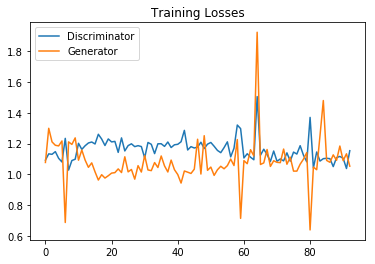

In [15]:
fig, ax = pyplot.subplots()
losses = np.array(losses)
pyplot.plot(losses.T[0], label='Discriminator')
pyplot.plot(losses.T[1], label='Generator')
pyplot.title("Training Losses")
pyplot.legend()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Step : 20 Epoch 1/1... Discriminator Loss: 2.6820... Generator Loss: 0.3345
Step : 40 Epoch 1/1... Discriminator Loss: 1.7709... Generator Loss: 0.4793
Step : 60 Epoch 1/1... Discriminator Loss: 1.3444... Generator Loss: 0.9691
Step : 80 Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.9497


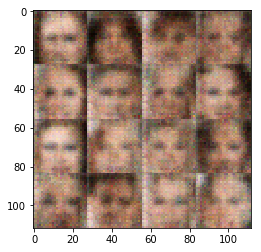

Step : 100 Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 1.0136
Step : 120 Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.9946
Step : 140 Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 0.9765
Step : 160 Epoch 1/1... Discriminator Loss: 1.2539... Generator Loss: 1.0292
Step : 180 Epoch 1/1... Discriminator Loss: 1.3178... Generator Loss: 0.9145


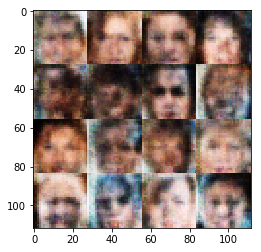

Step : 200 Epoch 1/1... Discriminator Loss: 1.2614... Generator Loss: 1.0283
Step : 220 Epoch 1/1... Discriminator Loss: 1.2401... Generator Loss: 0.9650
Step : 240 Epoch 1/1... Discriminator Loss: 1.2907... Generator Loss: 0.9321
Step : 260 Epoch 1/1... Discriminator Loss: 1.2781... Generator Loss: 0.9440
Step : 280 Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 0.9131


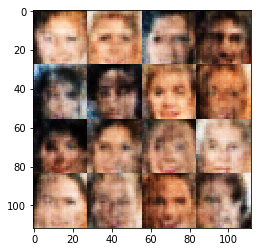

Step : 300 Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 1.0485
Step : 320 Epoch 1/1... Discriminator Loss: 1.2539... Generator Loss: 1.1073
Step : 340 Epoch 1/1... Discriminator Loss: 1.1849... Generator Loss: 1.1026
Step : 360 Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.8028
Step : 380 Epoch 1/1... Discriminator Loss: 1.2249... Generator Loss: 0.9711


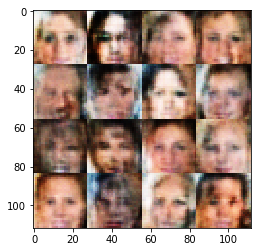

Step : 400 Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 1.0000
Step : 420 Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.9029
Step : 440 Epoch 1/1... Discriminator Loss: 1.3211... Generator Loss: 0.8731
Step : 460 Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.8160
Step : 480 Epoch 1/1... Discriminator Loss: 1.2082... Generator Loss: 0.9689


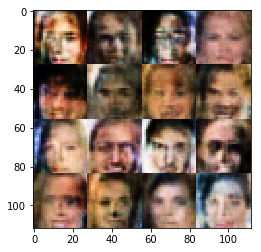

Step : 500 Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 0.8914
Step : 520 Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.9949
Step : 540 Epoch 1/1... Discriminator Loss: 1.2830... Generator Loss: 0.9926
Step : 560 Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.8382
Step : 580 Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.8662


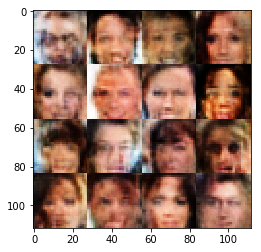

Step : 600 Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.8090
Step : 620 Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 0.9549
Step : 640 Epoch 1/1... Discriminator Loss: 1.3172... Generator Loss: 0.9016
Step : 660 Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 0.8188
Step : 680 Epoch 1/1... Discriminator Loss: 1.3610... Generator Loss: 0.7941


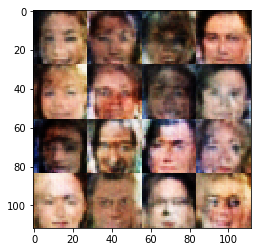

Step : 700 Epoch 1/1... Discriminator Loss: 1.2779... Generator Loss: 0.9520
Step : 720 Epoch 1/1... Discriminator Loss: 1.4963... Generator Loss: 0.7993
Step : 740 Epoch 1/1... Discriminator Loss: 1.2809... Generator Loss: 0.9476
Step : 760 Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.9148
Step : 780 Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.7872


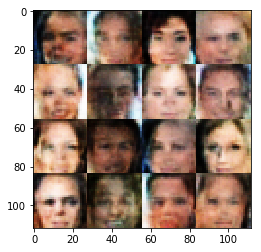

Step : 800 Epoch 1/1... Discriminator Loss: 1.4101... Generator Loss: 0.8458
Step : 820 Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.8659
Step : 840 Epoch 1/1... Discriminator Loss: 1.3154... Generator Loss: 0.8575
Step : 860 Epoch 1/1... Discriminator Loss: 1.2892... Generator Loss: 0.8864
Step : 880 Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 0.9156


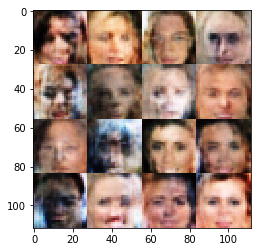

Step : 900 Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.7819
Step : 920 Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.8906
Step : 940 Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.7762
Step : 960 Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.8188
Step : 980 Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.8947


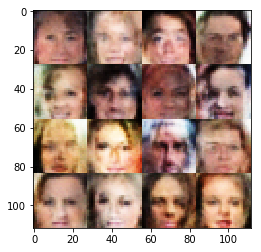

Step : 1000 Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 0.9265
Step : 1020 Epoch 1/1... Discriminator Loss: 1.3383... Generator Loss: 0.8369
Step : 1040 Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.8796
Step : 1060 Epoch 1/1... Discriminator Loss: 1.4075... Generator Loss: 0.8361
Step : 1080 Epoch 1/1... Discriminator Loss: 1.3194... Generator Loss: 0.8935


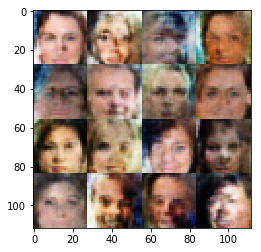

Step : 1100 Epoch 1/1... Discriminator Loss: 1.2862... Generator Loss: 0.9101
Step : 1120 Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.8369
Step : 1140 Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.8501
Step : 1160 Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.8133
Step : 1180 Epoch 1/1... Discriminator Loss: 1.3290... Generator Loss: 0.8914


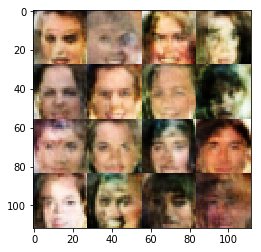

Step : 1200 Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.7591
Step : 1220 Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.8049
Step : 1240 Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.8181
Step : 1260 Epoch 1/1... Discriminator Loss: 1.3027... Generator Loss: 0.8643
Step : 1280 Epoch 1/1... Discriminator Loss: 1.3181... Generator Loss: 0.8223


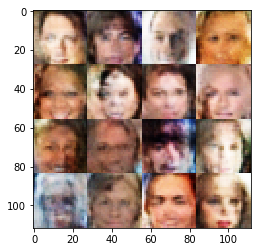

Step : 1300 Epoch 1/1... Discriminator Loss: 1.3456... Generator Loss: 0.8494
Step : 1320 Epoch 1/1... Discriminator Loss: 1.4069... Generator Loss: 0.7971
Step : 1340 Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.8483
Step : 1360 Epoch 1/1... Discriminator Loss: 1.2902... Generator Loss: 0.8455
Step : 1380 Epoch 1/1... Discriminator Loss: 1.3217... Generator Loss: 0.8435


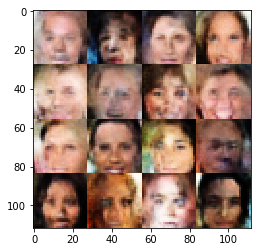

Step : 1400 Epoch 1/1... Discriminator Loss: 1.3713... Generator Loss: 0.8098
Step : 1420 Epoch 1/1... Discriminator Loss: 1.2705... Generator Loss: 0.8594
Step : 1440 Epoch 1/1... Discriminator Loss: 1.2395... Generator Loss: 0.9113
Step : 1460 Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.8078
Step : 1480 Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.8247


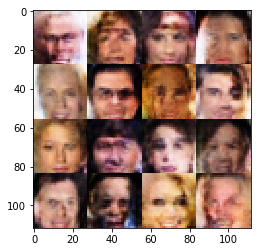

Step : 1500 Epoch 1/1... Discriminator Loss: 1.3424... Generator Loss: 0.8805
Step : 1520 Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.8552
Step : 1540 Epoch 1/1... Discriminator Loss: 1.1082... Generator Loss: 1.0539
Step : 1560 Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.8598
Step : 1580 Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 0.8275


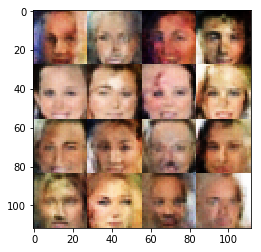

Step : 1600 Epoch 1/1... Discriminator Loss: 1.3846... Generator Loss: 0.8983
Step : 1620 Epoch 1/1... Discriminator Loss: 1.3009... Generator Loss: 0.8616
Step : 1640 Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.8765
Step : 1660 Epoch 1/1... Discriminator Loss: 1.2952... Generator Loss: 0.9107
Step : 1680 Epoch 1/1... Discriminator Loss: 1.1683... Generator Loss: 1.0330


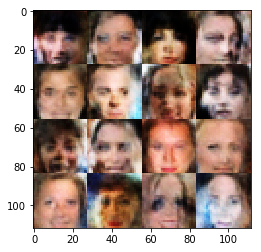

Step : 1700 Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.8511
Step : 1720 Epoch 1/1... Discriminator Loss: 1.4809... Generator Loss: 0.7712
Step : 1740 Epoch 1/1... Discriminator Loss: 1.3048... Generator Loss: 0.8404
Step : 1760 Epoch 1/1... Discriminator Loss: 1.3283... Generator Loss: 0.8556
Step : 1780 Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 0.8363


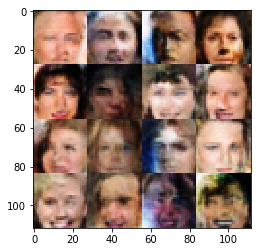

Step : 1800 Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.8859
Step : 1820 Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.8357
Step : 1840 Epoch 1/1... Discriminator Loss: 1.2780... Generator Loss: 0.8629
Step : 1860 Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 0.9190
Step : 1880 Epoch 1/1... Discriminator Loss: 1.1342... Generator Loss: 1.0589


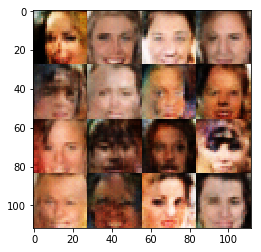

Step : 1900 Epoch 1/1... Discriminator Loss: 0.7013... Generator Loss: 1.8603
Step : 1920 Epoch 1/1... Discriminator Loss: 1.1468... Generator Loss: 1.0899
Step : 1940 Epoch 1/1... Discriminator Loss: 1.2714... Generator Loss: 1.0060
Step : 1960 Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 0.8952
Step : 1980 Epoch 1/1... Discriminator Loss: 1.2963... Generator Loss: 0.8876


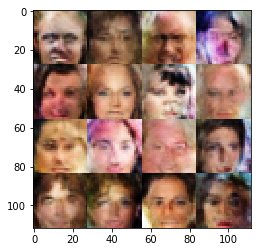

Step : 2000 Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 0.8354
Step : 2020 Epoch 1/1... Discriminator Loss: 1.2550... Generator Loss: 0.8771
Step : 2040 Epoch 1/1... Discriminator Loss: 1.2681... Generator Loss: 1.0493
Step : 2060 Epoch 1/1... Discriminator Loss: 1.2876... Generator Loss: 0.9633
Step : 2080 Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.8967


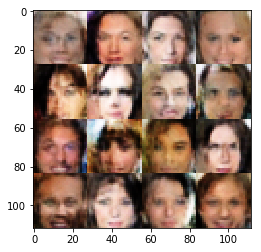

Step : 2100 Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.8694
Step : 2120 Epoch 1/1... Discriminator Loss: 1.4225... Generator Loss: 0.8155
Step : 2140 Epoch 1/1... Discriminator Loss: 1.2324... Generator Loss: 0.8698
Step : 2160 Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.8119
Step : 2180 Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.8688


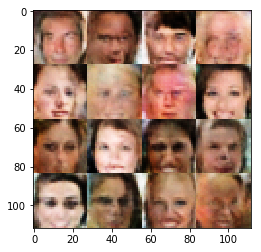

Step : 2200 Epoch 1/1... Discriminator Loss: 1.2929... Generator Loss: 0.8598
Step : 2220 Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.7903
Step : 2240 Epoch 1/1... Discriminator Loss: 1.2410... Generator Loss: 0.8776
Step : 2260 Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.7130
Step : 2280 Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.8973


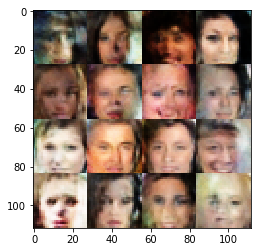

Step : 2300 Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.8459
Step : 2320 Epoch 1/1... Discriminator Loss: 1.3066... Generator Loss: 0.8107
Step : 2340 Epoch 1/1... Discriminator Loss: 1.2956... Generator Loss: 0.9156
Step : 2360 Epoch 1/1... Discriminator Loss: 1.4247... Generator Loss: 0.7665
Step : 2380 Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.8015


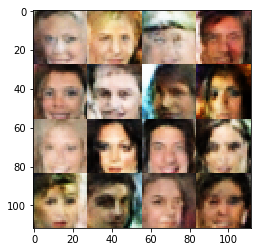

Step : 2400 Epoch 1/1... Discriminator Loss: 1.2610... Generator Loss: 0.8165
Step : 2420 Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.9417
Step : 2440 Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 0.8237
Step : 2460 Epoch 1/1... Discriminator Loss: 1.3101... Generator Loss: 0.8578
Step : 2480 Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.8292


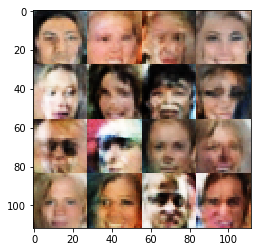

Step : 2500 Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.7684
Step : 2520 Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 0.9340
Step : 2540 Epoch 1/1... Discriminator Loss: 1.2606... Generator Loss: 0.8477
Step : 2560 Epoch 1/1... Discriminator Loss: 1.2698... Generator Loss: 0.8844
Step : 2580 Epoch 1/1... Discriminator Loss: 1.3045... Generator Loss: 0.8403


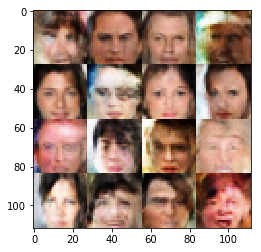

Step : 2600 Epoch 1/1... Discriminator Loss: 1.2154... Generator Loss: 0.8790
Step : 2620 Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 0.9441
Step : 2640 Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.8592
Step : 2660 Epoch 1/1... Discriminator Loss: 1.2656... Generator Loss: 0.8327
Step : 2680 Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.8460


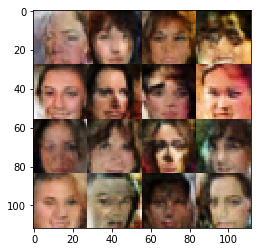

Step : 2700 Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 0.8058
Step : 2720 Epoch 1/1... Discriminator Loss: 1.3325... Generator Loss: 0.8338
Step : 2740 Epoch 1/1... Discriminator Loss: 1.2951... Generator Loss: 0.7993
Step : 2760 Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 0.8615
Step : 2780 Epoch 1/1... Discriminator Loss: 1.2693... Generator Loss: 0.8427


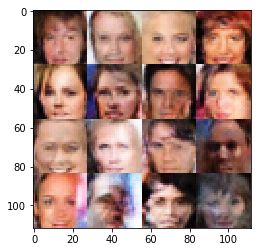

Step : 2800 Epoch 1/1... Discriminator Loss: 1.1966... Generator Loss: 0.8769
Step : 2820 Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.8937
Step : 2840 Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.8423
Step : 2860 Epoch 1/1... Discriminator Loss: 1.3541... Generator Loss: 0.8731
Step : 2880 Epoch 1/1... Discriminator Loss: 1.3609... Generator Loss: 0.8226


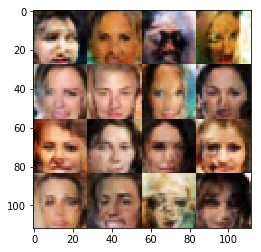

Step : 2900 Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 0.8265
Step : 2920 Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.8245
Step : 2940 Epoch 1/1... Discriminator Loss: 1.1735... Generator Loss: 0.9728
Step : 2960 Epoch 1/1... Discriminator Loss: 1.2085... Generator Loss: 0.9811
Step : 2980 Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.8558


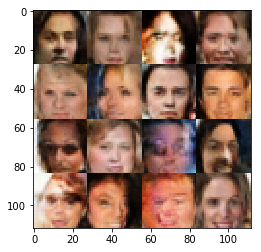

Step : 3000 Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.8082
Step : 3020 Epoch 1/1... Discriminator Loss: 1.2020... Generator Loss: 0.9118
Step : 3040 Epoch 1/1... Discriminator Loss: 1.2374... Generator Loss: 0.8743
Step : 3060 Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.8204
Step : 3080 Epoch 1/1... Discriminator Loss: 1.3074... Generator Loss: 0.8642


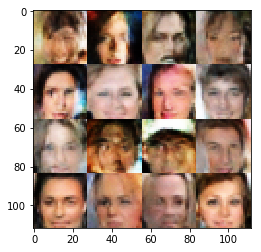

Step : 3100 Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.8578
Step : 3120 Epoch 1/1... Discriminator Loss: 1.2861... Generator Loss: 0.8276
Step : 3140 Epoch 1/1... Discriminator Loss: 1.2861... Generator Loss: 0.8568
Step : 3160 Epoch 1/1... Discriminator Loss: 1.3045... Generator Loss: 0.8642


In [19]:
batch_size = 64
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5
alpha=0.01


losses = []

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1
writer=tf.summary.FileWriter('/tmp/gan/face')
celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode,alpha,writer)


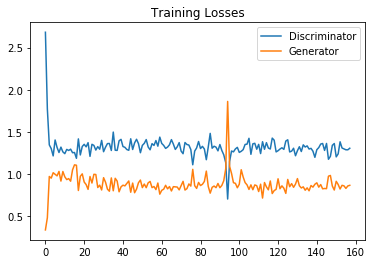

In [20]:
fig, ax = pyplot.subplots()
losses = np.array(losses)
pyplot.plot(losses.T[0], label='Discriminator')
pyplot.plot(losses.T[1], label='Generator')
pyplot.title("Training Losses")
pyplot.legend()

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.